## Exercise 7.2 Relationships Between Variables and Estimations

7.1

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nsfg

# Import nsfg data 
preg = nsfg.ReadFemPreg()

# Strip out two columns we need for exercise
live= preg[preg.outcome == 1]
live= live[['agepreg','totalwgt_lb']].dropna()


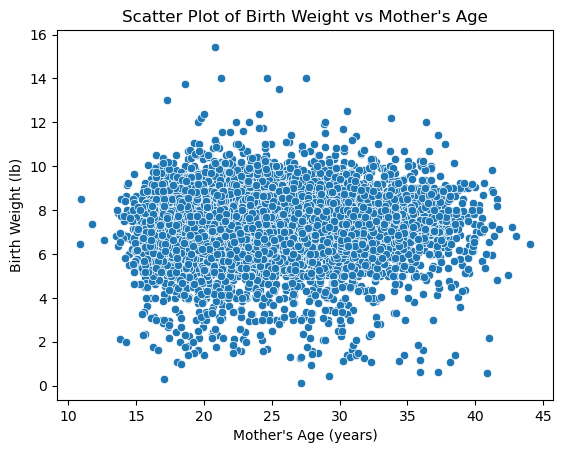

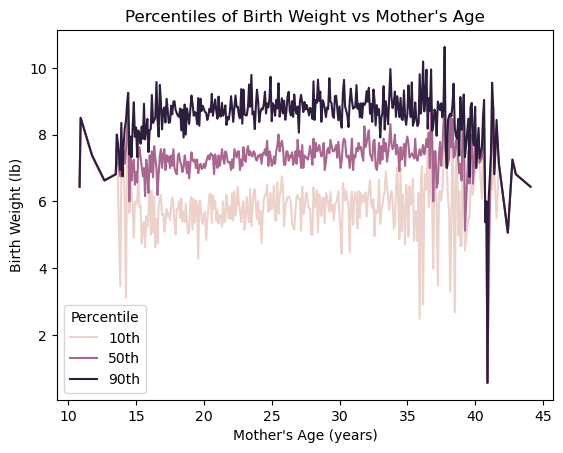

Pearson's Correlation: 0.06883397035410903
Spearman's Correlation: 0.09461004109658226


In [25]:
# Scatter birth weight vs mother's age
sns.scatterplot(x='agepreg', y='totalwgt_lb', data=live)
plt.xlabel('Mother\'s Age (years)')
plt.ylabel('Birth Weight (lb)')
plt.title('Scatter Plot of Birth Weight vs Mother\'s Age')
plt.show()


percentiles = preg.groupby('agepreg')['totalwgt_lb'].quantile([0.1, 0.5, 0.9]).reset_index()

# Plot percentiles of birth weight vs mother's age
# Changing labels- not formatting correctly

sns.lineplot(x='agepreg', y='totalwgt_lb', hue='level_1', data=percentiles)
plt.xlabel('Mother\'s Age (years)')
plt.ylabel('Birth Weight (lb)')
plt.title('Percentiles of Birth Weight vs Mother\'s Age')
plt.legend(title='Percentile', labels=['10th', '50th', '90th'])
plt.show()

pearson_correlation = preg['agepreg'].corr(preg['totalwgt_lb'], method='pearson')
print('Pearson\'s Correlation:', pearson_correlation)


spearman_correlation = preg['agepreg'].corr(preg['totalwgt_lb'], method='spearman')
print('Spearman\'s Correlation:', spearman_correlation)

8.1

In [27]:
# only using numpy this time. I want to see what happens if I don't use the SImulateSample def.

import numpy as np

# Here's my standard and mean
mu = 0
sigma = 1


samples = np.random.normal(mu, sigma, 1000)

# mean and median of the samples
mean = np.mean(samples)
median = np.median(samples)

# Why is this not working? I Would expect the Mean MSE to be closer to 6. 
mean_mse = ((mean - mu) ** 2) / 1000
median_mse = ((median - mu) ** 2) / 1000

print('Mean MSE:', mean_mse)
print('Median MSE:', median_mse)

variance = np.var(samples)
unbiased_variance = np.var(samples, ddof=1)

variance_mse = ((variance - sigma**2) ** 2) / 1000
unbiased_variance_mse = ((unbiased_variance - sigma**2) ** 2) / 1000

print('Variance MSE:', variance_mse)
print('Unbiased Variance MSE:', unbiased_variance_mse)


Mean MSE: 6.649868862215726e-07
Median MSE: 8.851035284510717e-07
Variance MSE: 4.6836215888201693e-07
Unbiased Variance MSE: 4.269322435685377e-07


8.2

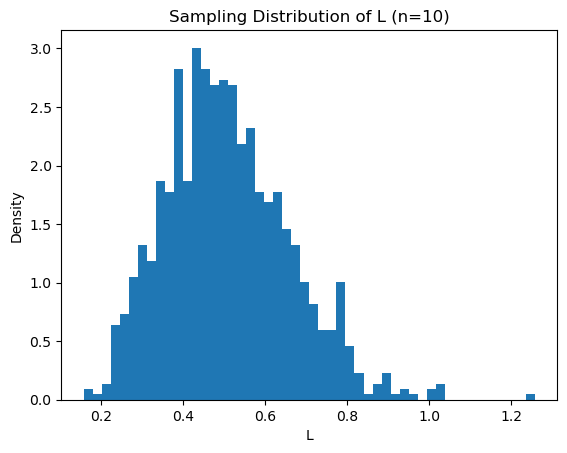

90% Confidence Interval: [0.28, 0.78]


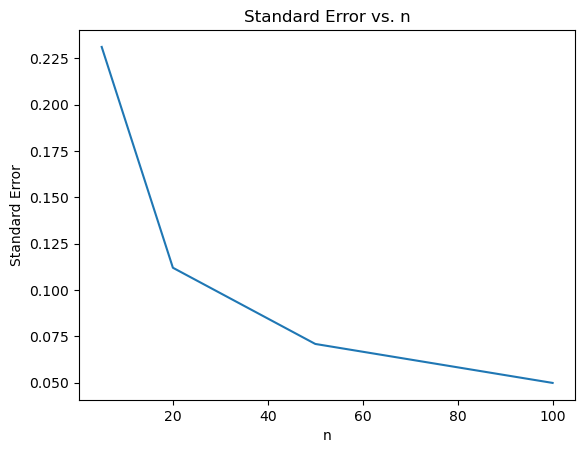

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# lambda
lambd = 2

n = 10
num_simulations = 1000
samples = np.random.exponential(1/lambd, (num_simulations, n))

L = samples.mean(axis=1)

# Can't get thinkstats import to work- using matplot instead
plt.hist(L, bins=50, density=True)
plt.xlabel('L')
plt.ylabel('Density')
plt.title('Sampling Distribution of L (n=10)')
plt.show()

# Compute the standard error of the estimate
standard_error = samples.std(ddof=1) / np.sqrt(n)

# Compute the 90% confidence interval
lower, upper = np.percentile(L, [5, 95])
print(f'90% Confidence Interval: [{lower:.2f}, {upper:.2f}]')

# Repeat the experiment with different values of n
n_values = [5, 20, 50, 100]
standard_errors = []
for n in n_values:
    samples = np.random.exponential(1/lambd, (num_simulations, n))
    standard_errors.append(samples.std(ddof=1) / np.sqrt(n))

plt.plot(n_values, standard_errors)
plt.xlabel('n')
plt.ylabel('Standard Error')
plt.title('Standard Error vs. n')
plt.show()


#OMG it worked!

In this instance, we see that, as expected, the standard error of the estimate diminishes as n rises. You would also see that as n rises, the 90% confidence interval of the estimate L gets smaller.